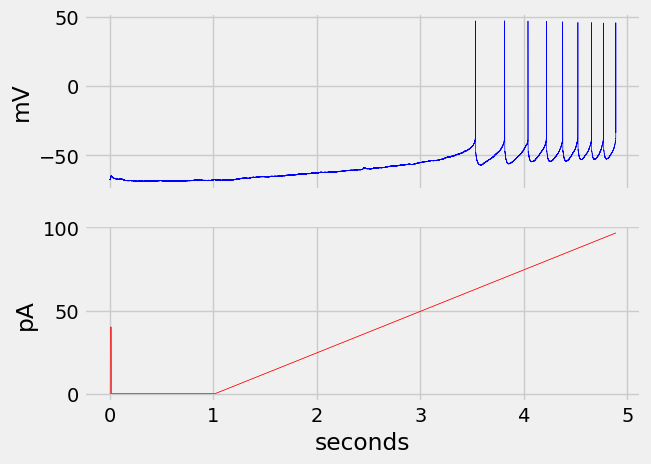

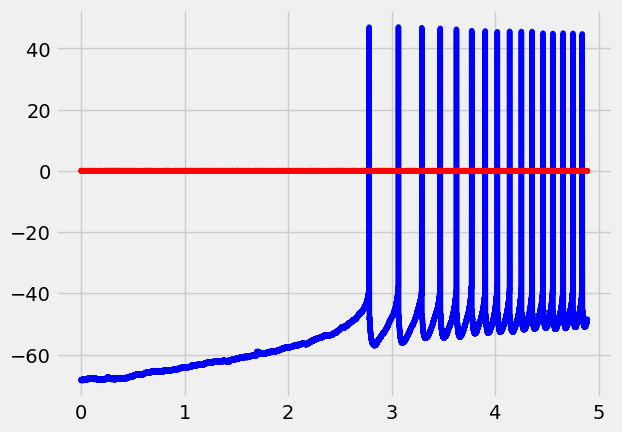

In [ ]:
from plot_data import plot_data
from allensdk.core.cell_types_cache import CellTypesCache
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np


cell_id = 323865917

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
data_set = ctc.get_ephys_data(cell_id)
sweeps = ctc.get_ephys_sweeps(cell_id)

selected_sweep = 8
sweep_data = data_set.get_sweep(sweeps[selected_sweep]["sweep_number"])
index_range = sweep_data["index_range"]
sampling_rate = sweep_data["sampling_rate"] # in Hz
t = (index_range[1]+1-index_range[0])/ sampling_rate

plot_data(cell_id, selected_sweep, 0, t)

# for i in range(0, len(sweeps)):
#     print(f"Sweep number is {i}")
#     if sweeps[i]['stimulus_units'] == 'Volts':
#         continue  
#     plot_data(cell_id, i, 0, 10)

i = sweep_data["stimulus"][index_range[0]:index_range[1]+1] # in A
v = sweep_data["response"][index_range[0]:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

lowcut = 10000.0 # Lower cutoff frequency in Hz
highcut = 50000.0 # Upper cutoff frequency in Hz
order = 4 # Filter order

# 'bandpass' type, 'sos' output recommended for stability
sos = signal.butter(order, [lowcut, highcut], btype='bandpass', fs = sampling_rate, output='sos')

# 3. Apply the filter to the signal
filtered_x = signal.sosfiltfilt(sos, v) # Use filtfilt for zero phase shift

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = (index_range[1]+1-index_range[0])/ sampling_rate

times = np.arange(v.shape[0]) / sampling_rate
plt.plot(times, v, color = "blue")
plt.plot(times, filtered_x, color = 'red')
plt.show()

